This section is dedicated to loading, preprocessing, and doing EDA on the steam_games and steam_reviews datasets. Data was first loaded in and then made into dataframes (df corresponds to the reviews dataset, and df_games corresponds to the games dataset). The data was also converted from .json.gz files into .csv files as those (from my experience at least) are easier to work with. Make sure to run everything in this notebook in order so that the imports load in a way that allows everything to work.

In [3]:
#required imports for entire notebook
import gzip
import ast
import pandas as pd
from collections import Counter, defaultdict
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#list to hold each review as a dictionary
rows = []


#open the gzip file and read line by line, handling any missing lines
with gzip.open("steam_reviews.json.gz", "rt", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        else:
            obj = ast.literal_eval(line)   #converts Python dict to real dict
            rows.append(obj)


#convert list of dictionaries to pandas dataframe
df = pd.DataFrame(rows)

#display the first few rows of the dataframe
df.head()

,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,compensation,user_id
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,₮ʜᴇ Wᴀʀᴛᴏɴ,51.1,769.0,328100,0,2017-12-27,looks like a facebook game,False,1,NaN,NaN,NaN
2,hello?<,14.6,2.0,328100,1,2017-10-16,Better than Minecraft,False,1,2.0,Product received for free,NaN
3,Cyderine916,5.0,64.0,35140,0,2018-01-04,I love and idolized Batman and this game is Ma...,False,1,NaN,NaN,NaN
4,DarklyThinking,16.6,577.0,35140,1,2018-01-04,Still worth playing in 2018.\nProbably my favo...,False,1,NaN,NaN,76561198007483075


In [4]:
#filter reviews by username "Chaos Syren". Change to any username to filter by that user
df[df['username'].str.contains('Chaos Syren')]


,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,compensation,user_id
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
3411634,Chaos Syren,107.1,41.0,376210,2,2017-09-01,The Isle has amazing graphics and realism. A f...,True,55,NaN,NaN,NaN
5185904,Chaos Syren,795.3,41.0,230410,6,2017-09-29,This game is about the most fun I have had gam...,False,1419,NaN,NaN,NaN


In [5]:
#list to hold each game and its details as a dictionary
rows_game = []

#open the gzip file and read line by line, handling any missing lines
#yes i did just copy and paste the above code and change variable names instead of making a function sue me
with gzip.open("steam_games.json.gz", "rt", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        else:
            obj = ast.literal_eval(line)   # converts Python dict to real dict
            rows_game.append(obj)

#convert list of dictionaries to pandas dataframe
df_games = pd.DataFrame(rows_game)

#display the first few rows of the dataframe
df_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [6]:
#there was one game that appeared twice, so we drop the duplicate
df_games = df_games.drop_duplicates(subset=['id'], keep='first')

In [2]:
#convert the reviews dataframe to a csv file for easier handling
df.to_csv('steam_reviews.csv', index=False)

NameError: name 'df' is not defined

In [ ]:
#convert the games dataframe to a csv file for easier handling
df_games.to_csv('steam_games.csv', index=False)

In [3]:
# if you dont want to run the above code, you can just read in the csv files directly
#required imports for entire notebook
import gzip
import ast
import pandas as pd
from collections import Counter, defaultdict
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

games_df = pd.read_csv('steam_games.csv')
reviews_df = pd.read_csv('steam_reviews.csv')

After successfully loading in the data, EDA was performed to find important correlations/associations/features that will be useful when building a pipeline.

In [4]:
#load the games dataframe
df_games = pd.read_csv('steam_games.csv')

# convert string representation of list to actual list
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return []

# convert genres from string to list if needed
df_games['genres'] = df_games['genres'].apply(safe_literal_eval)

# count individual genre frequencies
print("=== GENRE FREQUENCIES ===")
all_genres = []
for genre_list in df_games['genres']:
    all_genres.extend(genre_list)

genre_counts = Counter(all_genres)

# display genres sorted by frequency
print("\nGenres by frequency:")
for genre, count in genre_counts.most_common():
    print(f"{genre}: {count} games")

# analyze genre co-occurrence
print("\n=== GENRE CO-OCCURRENCE ANALYSIS ===")

# create a dictionary to count genre pairs
genre_pairs_count = defaultdict(int)
genre_cooccurrence = defaultdict(lambda: defaultdict(int))

for genres in df_games['genres']:
    # count pairs of genres that appear together
    for genre1, genre2 in itertools.combinations(sorted(genres), 2):
        genre_pairs_count[(genre1, genre2)] += 1
        genre_cooccurrence[genre1][genre2] += 1
        genre_cooccurrence[genre2][genre1] += 1

# display most common genre pairs
print("\nMost common genre pairs:")
sorted_pairs = sorted(genre_pairs_count.items(), key=lambda x: x[1], reverse=True)[:20]
for (genre1, genre2), count in sorted_pairs:
    print(f"({genre1}, {genre2}): {count} games")

# show which genres most frequently appear with each genre
print("\n=== GENRE ASSOCIATIONS ===")
for genre in list(genre_counts.keys())[:10]:  # show top 10 genres
    associated_genres = genre_cooccurrence[genre]
    if associated_genres:
        print(f"\nGenres that often appear with '{genre}':")
        sorted_associations = sorted(associated_genres.items(), key=lambda x: x[1], reverse=True)[:5]
        for associated_genre, count in sorted_associations:
            percentage = (count / genre_counts[genre]) * 100
            print(f"  - {associated_genre}: {count} times ({percentage:.1f}% of {genre} games)")

# create a genre matrix for visualization
print("\n=== GENRE CO-OCCURRENCE MATRIX (Top 15 genres) ===")
top_genres = [genre for genre, count in genre_counts.most_common(15)]
cooccurrence_matrix = pd.DataFrame(0, index=top_genres, columns=top_genres)

for genres in df_games['genres']:
    for genre1 in genres:
        for genre2 in genres:
            if genre1 in top_genres and genre2 in top_genres:
                cooccurrence_matrix.loc[genre1, genre2] += 1

# set diagonal to 0 to avoid self-counting
for genre in top_genres:
    cooccurrence_matrix.loc[genre, genre] = 0

print(cooccurrence_matrix)

# additional analysis: Genre combinations statistics
print("\n=== GENRE COMBINATION STATISTICS ===")
genre_counts_per_game = [len(genres) for genres in df_games['genres']]
print(f"Average number of genres per game: {sum(genre_counts_per_game) / len(genre_counts_per_game):.2f}")
print(f"Maximum genres in one game: {max(genre_counts_per_game)}")
print(f"Minimum genres in one game: {min(genre_counts_per_game)}")

# save results to files
# save genre frequencies
genre_freq_df = pd.DataFrame(genre_counts.most_common(), columns=['Genre', 'Count'])
genre_freq_df.to_csv('genre_frequencies.csv', index=False)

# save top genre pairs
pairs_df = pd.DataFrame([(g1, g2, count) for (g1, g2), count in sorted_pairs], 
                       columns=['Genre1', 'Genre2', 'Count'])
pairs_df.to_csv('genre_pairs.csv', index=False)

print(f"\nTotal unique genres: {len(genre_counts)}")
print(f"Total games analyzed: {len(df_games)}")

=== GENRE FREQUENCIES ===

Genres by frequency:
Indie: 15858 games
Action: 11319 games
Casual: 8282 games
Adventure: 8242 games
Strategy: 6957 games
Simulation: 6699 games
RPG: 5479 games
Free to Play: 2031 games
Early Access: 1462 games
Sports: 1257 games
Massively Multiplayer: 1108 games
Racing: 1083 games
Design &amp; Illustration: 460 games
Utilities: 340 games
Web Publishing: 268 games
Animation &amp; Modeling: 183 games
Education: 125 games
Video Production: 116 games
Software Training: 105 games
Audio Production: 93 games
Photo Editing: 77 games
Accounting: 7 games

=== GENRE CO-OCCURRENCE ANALYSIS ===

Most common genre pairs:
(Action, Indie): 7067 games
(Adventure, Indie): 5772 games
(Casual, Indie): 5328 games
(Indie, Strategy): 4338 games
(Action, Adventure): 3913 games
(Indie, RPG): 3653 games
(Casual, Simulation): 2800 games
(Indie, Simulation): 2516 games
(Adventure, Casual): 2500 games
(RPG, Strategy): 2175 games
(Action, Casual): 2172 games
(Adventure, RPG): 2100 games


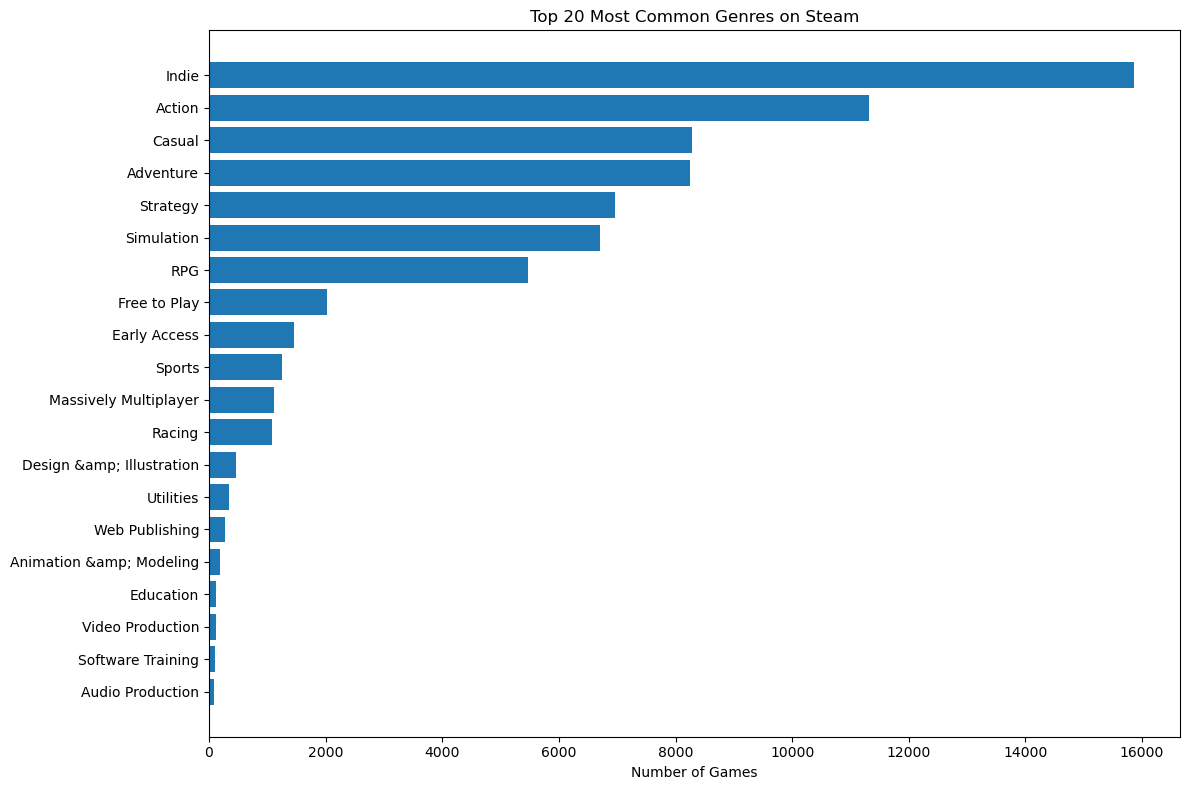

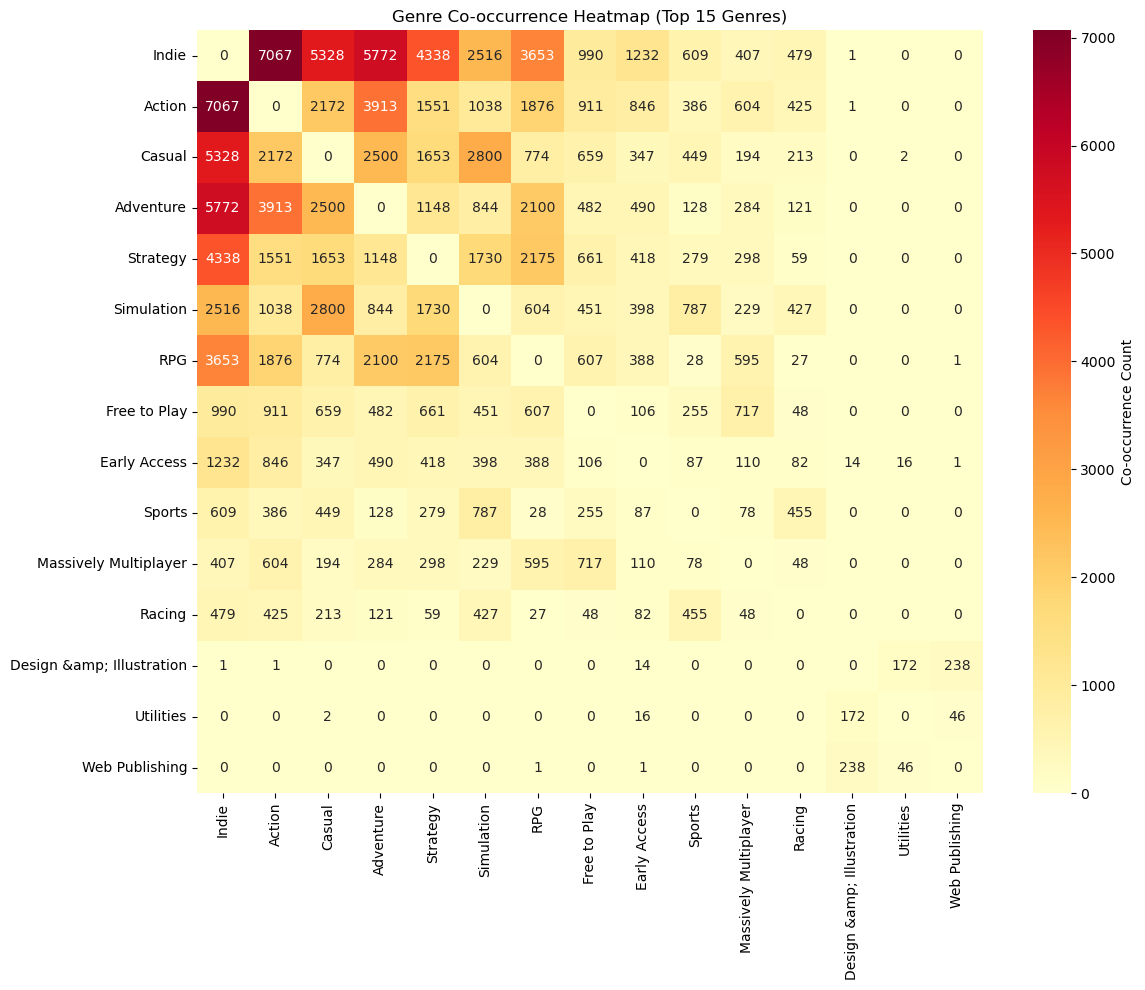

In [5]:
# Plot top genres
plt.figure(figsize=(12, 8))
top_20_genres = genre_counts.most_common(20)
genres, counts = zip(*top_20_genres)
plt.barh(genres, counts)
plt.xlabel('Number of Games')
plt.title('Top 20 Most Common Genres on Steam')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Heatmap of genre co-occurrence
plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence_matrix, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Co-occurrence Count'})
plt.title('Genre Co-occurrence Heatmap (Top 15 Genres)')
plt.tight_layout()
plt.show()

In [4]:
reviews_df = pd.read_csv('steam_reviews.csv')
games_df = pd.read_csv('steam_games.csv') 

def analyze_features(reviews_df, games_df):
    """
    Analyze which features are most valuable for game recommendations
    """
    
    print("=== FEATURE ANALYSIS FOR RECOMMENDER SYSTEM ===")
    
    # merge datasets to get game information for each review
    merged_df = reviews_df.merge(games_df, left_on='product_id', right_on='id', how='left')
    
    # playtime (hours)
    print("\n1. PLAY TIME ANALYSIS:")
    print(f"Average playtime: {reviews_df['hours'].mean():.2f} hours")
    print(f"Median playtime: {reviews_df['hours'].median():.2f} hours")
    print(f"Playtime distribution:\n{reviews_df['hours'].describe()}")
    
    # review text analysis
    print("\n2. REVIEW TEXT ANALYSIS:")
    review_lengths = reviews_df['text'].str.len()
    print(f"Average review length: {review_lengths.mean():.2f} characters")
    print(f"Reviews with text: {(reviews_df['text'].notna().sum() / len(reviews_df)) * 100:.1f}%")
    
    # user behavior patterns
    print("\n3. USER BEHAVIOR ANALYSIS:")
    user_stats = reviews_df.groupby('user_id').agg({
        'hours': ['mean', 'sum', 'count'],
        'product_id': 'nunique'
    }).round(2)
    
    user_stats.columns = ['avg_hours_per_game', 'total_hours', 'review_count', 'unique_games']
    print(f"Average games per user: {user_stats['unique_games'].mean():.2f}")
    print(f"Average reviews per user: {user_stats['review_count'].mean():.2f}")
    
    # game metadata importance
    print("\n4. GAME METADATA AVAILABILITY:")
    if not games_df.empty:
        metadata_fields = ['genres', 'tags', 'developer', 'publisher']
        for field in metadata_fields:
            if field in games_df.columns:
                available_pct = (games_df[field].notna().sum() / len(games_df)) * 100
                print(f"{field}: {available_pct:.1f}% available")
    
    return merged_df, user_stats

merged_df, user_stats = analyze_features(reviews_df, games_df)

=== FEATURE ANALYSIS FOR RECOMMENDER SYSTEM ===

1. PLAY TIME ANALYSIS:
Average playtime: 111.84 hours
Median playtime: 15.30 hours
Playtime distribution:
count    7.766532e+06
mean     1.118365e+02
std      3.928604e+02
min      0.000000e+00
25%      4.000000e+00
50%      1.530000e+01
75%      5.970000e+01
max      4.210070e+04
Name: hours, dtype: float64

2. REVIEW TEXT ANALYSIS:
Average review length: 337.89 characters
Reviews with text: 99.8%

3. USER BEHAVIOR ANALYSIS:
Average games per user: 1.99
Average reviews per user: 2.22

4. GAME METADATA AVAILABILITY:
genres: 89.8% available
tags: 99.5% available
developer: 89.7% available
publisher: 74.9% available
